In [42]:
import numpy as np
import seaborn as sns
import pandas as pd
import spectrum

sns.set_theme(style="darkgrid")

'/Users/laureldunn/pingthings/ni4ai/ni4ai-notebooks'

In [43]:
# Make sure you add your API key to the config file to connect!
with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
db = btrdb.connect(config['connection']['api_url'], config['connection']['api_key'])

FileNotFoundError: [Errno 2] No such file or directory: '../config.yaml'

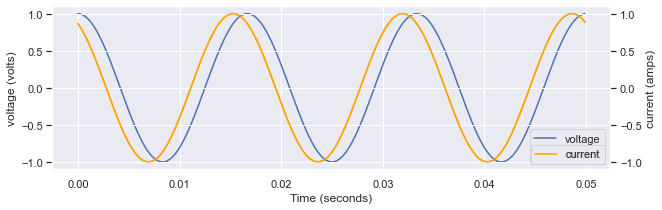

In [41]:
f = 60
phi_v = 0
phi_i = np.radians(30)

omega = lambda f: 2*np.pi*f
I = lambda t, f, phi: np.cos(omega(f)*t + phi)
V = lambda t, f, phi: np.cos(omega(f)*t + phi)

t = np.linspace(0,1,10000)
df = pd.DataFrame(columns=['time', 'voltage','current'], index=range(len(t)))
df['time'] = t
df['voltage'] = V(t, f, phi_v)
df['current'] = I(t, f, phi_i)
df['power'] = df['voltage']*df['current']

fig, ax = plt.subplots(figsize=(10,3))
ax2 = ax.twinx()
sns.lineplot(ax=ax, color='b', x='time', y='voltage', data=df.head(n=500), label='voltage')
sns.lineplot(ax=ax, color='orange', x='time', y='current', data=df.head(n=500), label='current')
sns.lineplot(ax=ax2, color='orange', x='time', y='current', data=df.head(n=500), label='current')
# sns.lineplot(ax=ax, color='k', lw=2, x='time', y='power', data=df.head(n=500), label='power')
ax.set_ylabel('voltage (volts)')
ax2.set_ylabel('current (amps)')
ax.set_xlabel('Time (seconds)')

plt.legend()
plt.show()

0.4